# Chapter 5: Quantum Gates

Single-qubit quantum gates and operations.

---

**Note:** This notebook corresponds to Chapter 5 of the textbook.

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_Software.ipynb` for installation instructions


In [1]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt

# Add utilities to path
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent / 'utilities'))




print('Setup complete!')

Setup complete!


## Import modules

In [2]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from IPython.display import display
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate, MCXGate
from qiskit.circuit.library.standard_gates.u import UGate
from qiskit.visualization.library import _generate_circuit_library_visualization
from qiskit_aer import Aer
# Import common utilities
from quantum_utils import simulateCircuit #type: ignore
import numpy as np

## Hadamard circuit

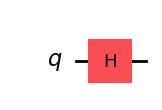

<IPython.core.display.Latex object>

In [3]:
circuit = QuantumCircuit(1) # 1 qubit
circuit.h(0) # apply H to qubit 0
display(circuit.draw('mpl'))

psi = Statevector(circuit) #extract the state
display(psi.draw('latex')) # print


## Simulating the Hadamard circuit

In [ ]:
circuit = QuantumCircuit(1, 1) 
circuit.h(0) # apply H to qubit 0
# measure and place result in classical bit
circuit.measure(0, 0) 
display(circuit.draw('mpl'))
backend = Aer.get_backend('qasm_simulator')
new_circuit = transpile(circuit, backend)
job = backend.run(new_circuit,shots = 1000)
counts = job.result().get_counts(circuit)
print('Counts:',counts)

## Function to simulate a circuit on classical computer

In [ ]:
# See utilities folder

## Function to run circuit on a real Quantum machine


In [ ]:
def runCircuitOnIBMQuantum(circuit,nShots=1024):
	service = QiskitRuntimeService()
	backend = service.least_busy(operational=True, simulator=False)
	print(f"Using backend: {backend}")
	circuit.measure_all()
	pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
	isa_circuit = pm.run(circuit) # optimize the circuit for hardware
	sampler = Sampler(mode=backend) 
	job = sampler.run([isa_circuit],shots = nShots)
	pub_result = job.result()[0]
	return pub_result.data.meas.get_counts()

## RX Circuit

In [ ]:
circuit = QuantumCircuit(1, 1)  
circuit.rx(np.pi/3,0) # apply Rx to qubit 0
circuit.measure(0, 0) 
display(circuit.draw('mpl')) 
counts = simulateCircuit(circuit,shots=1024)
print('Counts:',counts)

## Operators X and H in sequence

In [ ]:
circuit = QuantumCircuit(1, 1)  
circuit.x(0) 
circuit.h(0) 
circuit.measure(0, 0) 
display(circuit.draw('mpl'))
counts = simulateCircuit(circuit,1000)
print('Counts:',counts)

## State preparation

In [ ]:
circuit = QuantumCircuit(1, 1)  
q = Statevector([np.sqrt(8)/3, (1j)/3]) 
circuit.prepare_state(q,0,'Prepare q')
circuit.x(0) 
circuit.measure(0, 0) 
display(circuit.draw('mpl'))
counts = simulateCircuit(circuit,1000)
print('Counts:',counts)
